# Higgs $\rightarrow$ ZZ $\rightarrow$ 4L

Credits: This project is adapted from
- CERN Open Data Portal: http://opendata.cern.ch/record/5500
- MIT Junior Lab https://github.com/hmiaozh/MITJuniorLab/tree/master/HiggsTo4L
- ML class: https://github.com/fsimone91/course_ml4hep/blob/2024/notebooks/2024/2.1-dense-keras.ipynb

Google Colab: https://colab.research.google.com/drive/1AzjwfDJyoHOQ3NURSzI4QiikkTKuYlqD?usp=sharing

## 1. Introduction

### The Standard Model and the Higgs boson

The Higgs boson is an elementary particle in the Standard Model (SM), predicted by physicist Peter Higgs, whose name this particle is named after, along with five other scientists in 1964. With the collision data collected from the large hadron collider (LHC), the ATLAS and CMS Collaborations announced the discovery of the Higgs boson in 2012, which directly led to the Nobel Prize in the following year.

As one of the fundamental particles, it is the key of the "mechanism that contributes to our understanding of the origin of mass of subatomic particles"[1]. Elementary particles acquire mass through their interacting with the Higgs field. And the Higgs boson is the quantum of the Higgs field, like the photon to the electromagnetic field. It was until year 2012, the Higgs boson discovery was announced by the ATLAS and CMS collaborations (on 4th July 2012). Evidence of a new particle with properties consistent with the SM-predicted Higgs boson was present in three decay modes $H \to ZZ^* \to 4ℓ$, $H \to \gamma\gamma$, and $H \to WW^* \to ℓ\nuℓ\nu$ in both experiments.

In this lab project, you are going to reproduce the discovery in the so-called golden channel: $H \to ZZ^* \to 4ℓ$ using the LHC open data of RUN I (2009 – 2013, 7-8TeV).

[1] The Nobel Prize in Physics 2013

### $H \to ZZ^* \to 4ℓ$

**The Higgs boson production cross section at the LHC is relatively small compared to those of other processes**. The production of W and Z bosons and the production of top-antitop quark pairs are several orders of magnitude larger than Higgs boson production, let alone tremendous QCD process. These processes lead to **severe backgrounds in the Higgs boson search**. In the dataset collected by the ATLAS and CMS experiments until June 2012 about 200,000 Higgs bosons with a mass of 125 GeV were expected, compared with the total number of proton-proton collisions recorded during that time $~10^{11}$. Search for the Higgs boson against such large background is like search for needles in the sea.

One of the most sensitive channels is $H \to ZZ^* \to 4ℓ$ (ℓ = electron or muon.). The requirement of the presence of four leptons suppresses the hadronic background, leaving pretty clean final states. For this reason, $H \to ZZ^* \to 4ℓ$ is referred to as “golden channel” of the Higgs boson decays. It has the cleanest signature, and also the clearest due to the complete reconstruction of the final state decay products (no neutrinos, all decay products are "visible") and excellent lepton momentum resolution. The Higgs boson invariant mass can be reconstructed with good precision and a sharp resonance of the Higgs boson can be searched for on top of the continuous backgrounds.


The Feynman Diagram below shows the full chain of pp collision - Higgs boson production[*] - HtoZZto4L decay. And the figure here is a real event display in the CMS detector of $H \to ZZ^* \to 4ℓ$.

<img src="https://github.com/hmiaozh/MITJuniorLab/blob/master/HiggsTo4L/figures/4-lepton_Higgs_decay.svg?raw=1" alt="Drawing" style="width: 400px;"/>
<img src="https://github.com/hmiaozh/MITJuniorLab/blob/master/HiggsTo4L/figures/eventdisplay.png?raw=1" alt="Drawing" style="width: 400px;"/>


In this decay, events are selected by firstly requiring the presence of four well reconstructed, isolated leptons ($\mu$ or e).

In this Junior Lab project, this step has already been done. To reduce the size of the data and Monte Carlo (MC) simulations needed to process and to avoid complexity of points which are less important in this project, the **data and MC given are already pre-processed to a collection of four well-reconstructed and isolated leptons**. The aim is to understand the decay of the Higgs boson to four leptons, and make use of the properties of the decay products to perform a Higgs boson search.

Regardless of the relative clean and clear signature, there're still large backgrounds. The largest background comes from continuum ($Z/\gamma^*$)($Z^*/\gamma^*$) production, referred to as ZZ* production in the following. Below is a feynman diagram showing the leading order ZZ* production. Only the bottom right corner one is the signal (Higgs production) we want, others are all backgrounds.

<img src="https://github.com/hmiaozh/MITJuniorLab/blob/master/HiggsTo4L/figures/Lowest-order-Feynman-diagrams-for-ZZ-production.png?raw=1" alt="Drawing" style="width: 300px;"/>

Since this background has exactly the same decay products as our signal process, it is irreducible. <br>
Besides, there are additional backgrounds from the production of Z+jets and ttbar (top quark and antitop quark) pairs. For these backgrounds two isolated leptons emerge from $Z \to ℓℓ$ (Z+jets) or from the decay $t \to Wb \to ℓ\nu b$ (ttbar), respectively. In addition, two further leptons may originate from the decays of the fragmentation products of the heavy b-quarks or jets might be misidentified as leptons. These leptons are less isolated and, when arising from b-quarks, do not originate from the primary interaction point (where decays of the Higgs and Z bosons take place). These backgrounds are reducible. The track-isolation requirements and impact-parameter requirements in the pre-process already largely suppresses the reducible background, well below the level of the irreducible ZZ* continuum background.

Then as a conclusion, **you'll be performing a search for a resonance peak in the four-lepton invariant mass spectrum, against the large irreducible ZZ* background**. The reason why such a search is difficult is that it is few signal events against thousands or sometimes even millions backgrounds; the signal can easily be covered/erased by statistical fluctuation. To safely and scientifically interpret the data, in particle physics, an excess in data with $5\sigma$ deviation from the background-only hypothesis is quoted as "discovery".  In channel $H \to ZZ^* \to 4ℓ$ alone, 3.2 standard deviation is reported in original publication (together with other channels more than $5\sigma$ is reported). In this project, due to the less sophisticated background suppression, it would already be good if a ~$2\sigma$ excess can be reached. You can compare your results with the one in publication as shown below:

<img src="https://github.com/hmiaozh/MITJuniorLab/blob/master/HiggsTo4L/figures/InvMass_publication.png?raw=1" alt="Drawing" style="width: 400px;"/>

The key is to understand this process, the decay products properties. Then based on one's understanding, make selections to maximize the signal-to-background ratio, i.e. cut out events more background-like and at the same time keep as many signal events.

Reference of * and More on the Higgs boson discovery and its decay channels can be found: <br>
http://www.scholarpedia.org/article/The_Higgs_Boson_discovery#Discovery_of_the_Higgs_boson

[*] There are several different ways of the Higgs boson production at a pp collider. The Feynman diagram here only shows one of them as an example.

## 2. Analysis
### Data and MC
- In the data and MC folders, you're provided collections of four well constructed and isolated leptons
    - File format: .csv for processing convenience with Jupyter Notebook
    - Each entry contains 34 elements: Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,PID2,Q2,E2,px2,py2,pz2,eta2,phi2,PID3,Q3,E3,px3,py3,pz3,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4.
        - They are: the Run number and event number of this event (used to label the event), the type of the lepton and you can find in this link http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf page 2 a corresponding of the PID (particle ID) and the type of the lepton, like PID = 11 means an electron; and the kinematic information of the four leptons (their energy(E), momentum(px,py,pz), and eta and phi)
    - Files are separated by year (2011/2012), and process (for MC)
        

- Some concepts to understand in advance:
    - The pseudorapidity, $\eta$, ~eta in the file, is defined as $\eta = -ln[tan(\theta/2)]$, where $\theta$ is the polar angle measured from the anticlockwise beam direction.
    - The azimuthal angle, $\phi$, ~phi in the file, measured the axis defined by the beam directions
        - $\eta - \phi$ space gives a coordinate system
    - The transverse momentum, pT, denotes the component of momentum perpendicular to the beam axis (in the x-y plane).
    - You may read more on the coordinates system from https://www.lhc-closer.es/taking_a_closer_look_at_lhc/0.momentum

### Code and work flow
The code below provides a beginning of the analysis: open the file, read the entries, plot some distributions, and make the publication-plot you need to perform your search: the invariant mass of the four leptons.

Although both the data and MC are already pre-processed, they're still far from good to claim a Higgs boson peak. Your goal here is to observe the data, play with them, make selections on the events, and reconstruct the four leptons invariant mass after the selection to try to reproduce the peak as in the publication. Remember, the dataset provided here are small because of pre-process. In reality, you may face millions, billions or even more number of events to dealt with!

Now let's walk through the codes!

In [1]:
#@title Importing libraries
import numpy as np
import pandas as pd
import math as mt
import scipy.optimize as opt
import scipy.stats as sta
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
import csv

In [2]:
#@title Download the data and MC samples

try:
  import wget
except:
  !pip install wget
  import wget
wget.download("https://cernbox.cern.ch/remote.php/dav/public-files/KcSSPNShypbVBNX/data.zip")
wget.download("https://cernbox.cern.ch/remote.php/dav/public-files/KcSSPNShypbVBNX/MC.zip")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=03e488dc9f7db09f32b621899e97a255cb064956be4d7454a9be0b4207662403
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'MC.zip'

In [3]:
#@title Unzip the files
from zipfile import ZipFile
with ZipFile("data.zip", 'r') as zip:
    zip.extractall()
with ZipFile("MC.zip", 'r') as zip:
    zip.extractall()

In [38]:
#@title Some scale factors and constants you might use

## mass square of muon: m_muon^2 (in GeV)
sqm1 = (0.105658) * (0.105658)
## mass square of electron: m_e^2 (in GeV)
sqme = (0.0005109989) * (0.0005109989)
## mass of Z boson (in GeV)
mZ = 91.1876


## constants for the scale factor of MC. The MC is produced at a certain cross section\
## with certain number of events. To increase statistics, the event numbers generated are usually very large,\
## therefore a scale factor is needed to apply on the MC to make them agree with data.
## Scale factor for each MC component is: lumi * xsec / nevt, as provided below

## Luminosity of each year
lumi12 = 11580.
lumi11 = 2330.

## MC cross section of each process
xsecZZ412 = 0.107
xsecZZ2mu2e12 = 0.249
xsecZZ411 = 0.093
xsecZZ2mu2e11 = 0.208

xsecTTBar12 = 200.
xsecTTBar11 = 19.504

xsecDY5012 = 2955.
xsecDY1012 = 10.742
xsecDY5011 = 2475.
xsecDY1011 = 9507.

scalexsecHZZ12 = 0.0065
scalexsecHZZ11 = 0.0057

## Number of MC Events generated for each process
nevtZZ4mu12 = 1499064
nevtZZ4e12 = 1499093
nevtZZ2mu2e12 = 1497445
nevtHZZ12 = 299973
nevtTTBar12 = 6423106
nevtDY5012 = 29426492
nevtDY1012 = 6462290

nevtZZ4mu11 = 1447136
nevtZZ4e11 = 1493308
nevtZZ2mu2e11 = 1479879
nevtHZZ11 = 299683
nevtTTBar11 = 9771205
nevtDY5011 = 36408225
nevtDY1011 = 39909640


labels = ['$m_{H}$ = 125 GeV', r'ZZ $\rightarrow$ 4l', 'Z/$\gamma^{*}$ + X', r'$t\bar{t}$']
colors = ['r','b','g','gray']
scales_higgs = [lumi11*scalexsecHZZ11/nevtHZZ11, lumi12*scalexsecHZZ12/nevtHZZ12]
scales_zz = [lumi11*xsecZZ411/nevtZZ4mu11, lumi11*xsecZZ2mu2e11/nevtZZ2mu2e11, lumi11*xsecZZ411/nevtZZ4e11,\
             lumi12*xsecZZ412/nevtZZ4mu12, lumi12*xsecZZ2mu2e12/nevtZZ2mu2e12, lumi12*xsecZZ412/nevtZZ4e12]
scales_dy = [lumi11*xsecDY1011/nevtDY1011, lumi11*xsecDY5011/nevtDY5011, \
             lumi12*xsecDY1012/nevtDY1012, lumi11*xsecDY5012/nevtDY5012]
scales_tt = [lumi11*xsecTTBar11/nevtTTBar11, lumi12*xsecTTBar12/nevtTTBar12]

In [39]:
#@title Open the files as pandas dataframes

# read datalist of each year and combine to one
data_year  = [pd.read_csv('data/clean_data_2011.csv',index_col=None, header=0)]
data_year += [pd.read_csv('data/clean_data_2012.csv',index_col=None, header=0)]
data = pd.concat(data_year,axis=0,ignore_index=True)


# read MClist of each process and each year
mc_higgs_11 = pd.read_csv('MC/higgs2011.csv',index_col=None, header=0)
mc_higgs_12 = pd.read_csv('MC/higgs2012.csv',index_col=None, header=0)
## ZZ*
mc_zz4mu_11 = pd.read_csv('MC/zzto4mu2011.csv',index_col=None, header=0)
mc_zz2mu2e_11 = pd.read_csv('MC/zzto2mu2e2011.csv',index_col=None, header=0)
mc_zz4e_11 = pd.read_csv('MC/zzto4e2011.csv',index_col=None, header=0)

mc_zz4mu_12 = pd.read_csv('MC/zzto4mu2012.csv',index_col=None, header=0)
mc_zz2mu2e_12 = pd.read_csv('MC/zzto2mu2e2012.csv',index_col=None, header=0)
mc_zz4e_12 = pd.read_csv('MC/zzto4e2012.csv',index_col=None, header=0)
## Drell-Yan
mc_dy10_11 = pd.read_csv('MC/dy1050_2011.csv',index_col=None, header=0)
mc_dy50_11 = pd.read_csv('MC/dy50_2011.csv',index_col=None, header=0)
mc_dy10_12 = pd.read_csv('MC/dy1050_2012.csv',index_col=None, header=0)
mc_dy50_12 = pd.read_csv('MC/dy50_2012.csv',index_col=None, header=0)
## ttbar
mc_ttbar_11 = pd.read_csv('MC/ttbar2011.csv',index_col=None, header=0)
mc_ttbar_12 = pd.read_csv('MC/ttbar2012.csv',index_col=None, header=0)

#add a column with normalisation factor for MC
def add_scale_column(df_list, scale_list):
  if len(df_list)!=len(scale_list):
    raise ValueError("the two lists must have same length")
  else:
    for i, df in enumerate(df_list):
      df['scale']=scale_list[i]

# creat a combined list of MC to study the shape
mc_higgs = [mc_higgs_11, mc_higgs_12]
mc_zz = [mc_zz4mu_11, mc_zz2mu2e_11, mc_zz4e_11, mc_zz4mu_12, mc_zz2mu2e_12, mc_zz4e_12]
mc_dy = [mc_dy10_11, mc_dy50_11, mc_dy10_12, mc_dy50_12]
mc_tt = [mc_ttbar_11, mc_ttbar_12]

add_scale_column(mc_higgs, scales_higgs)
add_scale_column(mc_zz, scales_zz)
add_scale_column(mc_dy, scales_dy)
add_scale_column(mc_tt, scales_tt)

#convert to pandas dataframe
mc_sig = pd.concat(mc_higgs,axis=0,ignore_index=True)
mc_bkg_zz = pd.concat(mc_zz,axis=0,ignore_index=True)
mc_bkg_dy = pd.concat(mc_dy,axis=0,ignore_index=True)
mc_bkg_tt = pd.concat(mc_tt,axis=0,ignore_index=True)

## list of all MC dataframes (useful for plotting or selections):
mc_all = [mc_sig, mc_bkg_zz, mc_bkg_dy, mc_bkg_tt]

Before starting, let's take a look to our data and MC samples



In [40]:
data.describe(include='all')
#print(data.info())

#YOUR CODE HERE: do the same for mc_sig, mc_bkg_zz, mc_bkg_dy, mc_bkg_tt
#mc_bkg_zz.describe(include='all')

,Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,...,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4
count,2724.000000,2.724000e+03,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,...,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000
mean,190317.543686,4.942543e+08,-0.116006,0.008811,61.619331,0.023476,-0.458137,-0.849233,-0.039952,-0.002258,...,0.012449,0.063626,-0.020558,0.003671,22.366646,-0.142499,-0.272839,-0.120814,-0.017855,0.004839
std,13744.655245,4.906822e+08,12.795509,1.000145,62.777203,28.755741,30.364636,77.391653,1.248565,1.820519,...,1.288235,1.821470,11.715110,1.000177,38.486387,11.668902,12.937102,40.963490,1.338522,1.822730
min,160957.000000,-2.144117e+09,-13.000000,-1.000000,3.026570,-186.502000,-311.050000,-572.515000,-2.548150,-3.136020,...,-2.489220,-3.140980,-13.000000,-1.000000,1.877570,-103.623000,-211.914000,-629.784000,-2.552460,-3.137810
25%,173198.000000,1.610436e+08,-13.000000,-1.000000,20.323975,-14.179600,-14.256875,-25.720700,-1.047645,-1.572760,...,-1.004290,-1.514102,-11.000000,-1.000000,6.194840,-3.688483,-3.295878,-7.913790,-1.062140,-1.568573
50%,196210.500000,3.826659e+08,-11.000000,1.000000,44.051800,-0.163730,-0.524182,-0.604253,-0.033130,-0.053124,...,0.020752,0.140458,-11.000000,1.000000,10.888950,-0.090300,-0.155502,-0.031073,-0.003261,-0.068232
75%,200190.000000,7.688249e+08,13.000000,1.000000,75.848625,13.602600,13.051625,24.013525,0.955950,1.594025,...,1.021432,1.636385,11.000000,1.000000,23.075475,3.451973,3.140070,8.052140,1.051615,1.606322
max,203002.000000,2.137708e+09,13.000000,1.000000,593.985000,159.832000,178.112000,567.603000,2.482520,3.137970,...,2.567280,3.129300,13.000000,1.000000,861.049000,86.557500,162.402000,834.534000,2.520190,3.140760


# Inputs for discussion
*   Think about the meaning of the different columns. The header of the input files is:
    Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,PID2,Q2,E2,px2,py2,pz2,eta2,phi2,PID3,Q3,E3,px3,py3,pz3,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4
*   How do physicists measure the electric charge?
*   Why is the number of entries so different in data wrt MC?
*   Why do we need to scale the MC events?



Add a column with transverse momentum $p_T$ for each final state lepton<br>
$p_{T_1} = \sqrt{p_{x_1}^2 + p_{y_1}^2}$<br>
$p_{T_2} = \sqrt{p_{x_2}^2 + p_{y_2}^2}$<br>
$p_{T_3} = \sqrt{p_{x_3}^2 + p_{y_3}^2}$<br>
$p_{T_4} = \sqrt{p_{x_4}^2 + p_{y_4}^2}$<br>

In [41]:
#Here we define some auxiliary functions
#pt = transverse momentum
def pt(px, py):
    return np.sqrt(px**2 + py**2)

In [42]:
#Compute transverse momentum (pT) for each final state muon and add it to the dataframe
for mc in mc_all:
   for lepton in range(1,5):
      label = str(lepton) #1,2,3,4
      mc['pt'+label] = pt(mc['px'+label], mc['py'+label])
   #print(mc.columns) #check

#same in data!
for lepton in range(1,5):
  label = str(lepton) #1,2,3,4
  data['pt'+label] = pt(data['px'+label], data['py'+label])
#print(data.columns) #check


Each Particle has its 4-momentum vector $(E, p_x, p_y, p_z)$ <br>
For the four lepton individually and the 4-lepton system we have:<br>
lepton 1: $\overrightarrow{p_1} = (E_1,p_{x1},p_{y1},p_{z1})$<br>
lepton 2: $\overrightarrow{p_2} = (E_1,p_{x2},p_{y2},p_{z2})$<br>
lepton 3: $\overrightarrow{p_3} = (E_1,p_{x3},p_{y3},p_{z3})$<br>
lepton 4: $\overrightarrow{p_4} = (E_1,p_{x4},p_{y4},p_{z4})$<br>
4-lepton system:<br>
$\overrightarrow{p_{4l}} = (E_{4l},p_{x4l},p_{y4l},p_{z4l})$<br>
$= (E_1+E_2+E_3+E_4, p_{x1}+p_{x2}+p_{x3}+p_{x4}, p_{y1}+p_{y2}+p_{y3}+p_{y4}, p_{z1}+p_{z2}+p_{z3}+p_{z4})$<br>
Then the invariant mass of the 4-lepton system can be calculated:<br>
$m_{4l} = \sqrt{E_{4l}^2 - (px_{4l}^2 + py_{4l}^2 + pz_{4l}^2)}$


2-lepton system:<br>
$\overrightarrow{p_{tot}} = (E_{tot},p_{xtot},p_{ytot},p_{ztot})$<br>
$= (E_1+E_2, p_{x1}+p_{x2}, p_{y1}+p_{y2}, p_{z1}+p_{z2})$<br>
Then the invariant mass of the 4-lepton system can be calculated:<br>
$m_{12} = \sqrt{E_{tot}^2 - (px_{tot}^2 + py_{tot}^2 + pz_{tot}^2)}$

In [43]:
#invariant mass of 4 objects
def InvMass_4l(df):
    E_tot = df['E1'] + df['E2'] + df['E3'] + df['E4']
    px_tot = df['px1'] + df['px2'] + df['px3'] + df['px4']
    py_tot = df['py1'] + df['py2'] + df['py3'] + df['py4']
    pz_tot = df['pz1'] + df['pz2'] + df['pz3'] + df['pz4']
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

In [44]:
#invariant mass of 2 objects (we will need it later)
def InvMass_2l(E1, px1, py1, pz1, E2, px2, py2, pz2):
    return np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))

In [45]:
#Add auxiliary quantities: compute 4-lepton invariant mass and add it to the dataframe
for mc in mc_all:
  mc["m4l"] = InvMass_4l(mc)
data["m4l"] = InvMass_4l(data)
#print(data) #check



---


# Extra: the "Review of Particle Physics" by the Particle Data Group

The Particle Data Group (PDG) is an international collaboration of particle physicists that compiles and reanalyzes published results related to the properties of particles and fundamental interactions.

The "Review of Particle Physics" (most often referred to as the "PDG") is *vademecum* for any particle physicist.

In this subsection of our exercise, we use the [PDG API](https://pdgapi.lbl.gov/doc/pythonapi.html) to consult the book interactively!

In [46]:
#@title Importing the PDG API
try:
  import pdg
except:
  !pip install pdg
  import pdg

api = pdg.connect()

In our datasets we have a column named "PID", Particle Identifier. It contains a number which indicates whether a particle is a muon or an electron.

Note: In data, the `PID` is assigned by the particle reconstruction algorithms, while in MC the `PID` directly comes from the simulation.

**Question:** what does the PID sign indicate?

In [147]:
#let's look at the PID values in our samples
print(mc_sig["PID1"])

0        13
1        11
2        13
3       -13
4       -13
         ..
92773   -13
92774    13
92775    13
92776    13
92777   -11
Name: PID1, Length: 92778, dtype: int64


In [48]:
#find out more using the Particle Data Group API
for p in api.get_particle_by_mcid(13).properties():
    print('%16s:  %-60s    %s' % (p.pdgid, p.description, p.display_value_text))

#YOUR CODE HERE: do the same for PID=11

    S004AMU/2024:  mu MASS (atomic mass units u)                                   0.1134289259+-0.0000000025
      S004M/2024:  mu MASS                                                         105.6583755+-0.0000023
      S004T/2024:  mu MEAN LIFE tau                                                (2.1969811+-0.0000022)E-6
     S004DT/2024:  meanlife(mu+)/meanlife(mu-) MEAN LIFE RATIO                     1.00002+-0.00008
    S004DTT/2024:  (meanlife(mu+)-meanlife(mu-))/meanlife(average)                 (2+-8)E-5
    S004MPR/2024:  mu/p MAGNETIC MOMENT RATIO                                      3.18334514+-0.00000007
     S004MM/2024:  mu_mu/(ehbar/2m_mu)-1 = (g_mu-2)/2                              0.00116592059+-0.00000000022
    S004MMR/2024:  (electron g-factor(mu+)-electron g-factor(mu-))/electron g-factor(average)    (-1.1+-1.2)E-9
    S004EDM/2024:  mu ELECTRIC DIPOLE MOMENT (d)                                   < 1.8 E-19
    S004MEC/2024:  MUON-ELECTRON CHARGE RATIO ANOMALY q(mu

In [149]:
#Our search involves the higgs and Z bosons, let's look at their properties
print('Z boson mass ',pdg.connect().get_particle_by_name('Z').mass,\
      ', charge ',pdg.connect().get_particle_by_name('Z').charge)

for decay in api.get_particle_by_name('Z').exclusive_branching_fractions():
  print('%-60s %s' % (decay.description, decay.value))

#YOUR CODE HERE: do the same for the Higgs boson
print('Higgs boson mass ',pdg.connect().get_particle_by_name('H').mass,\
      ', charge ',pdg.connect().get_particle_by_name('H').charge)

for decay in api.get_particle_by_name('H').exclusive_branching_fractions():
  print('%-60s %s' % (decay.description, decay.value))

Z boson mass  91.1879780919373 , charge  0.0
Z --> e+ e-                                                  0.033632
Z --> mu+ mu-                                                0.033662
Z --> tau+ tau-                                              0.033696
Z --> lepton+ lepton-                                        0.033658
Z --> lepton+ lepton- lepton+ lepton-                        4.55462687513177e-06
Z --> invisible                                              0.2
Z --> hadrons                                                0.69911
Z --> pi0 gamma                                              2.01e-05
Z --> eta gamma                                              5.1e-05
Z --> rho0 gamma                                             4e-06
Z --> omega gamma                                            3.9e-06
Z --> eta^'(958) gamma                                       4.2e-05
Z --> phi gamma                                              7e-07
Z --> gamma gamma                               

---



Now, make selections on the events: understand the signature of the signal (higgs) process, and make use of those signature to suppress background, but without hurting the signal yields. That is to say, find out features that signal has but background doesn't, and make a filter based on those feature, which may include:
*   The flavor and charge of the lepton?
*   We look for $H \to ZZ^* \to 4ℓ$, how about the intermediate process, constrains on the Z boson?

You may want to read the original publication of the Higgs discovery: https://arxiv.org/pdf/1207.7235.pdf (notice you might find it too technical, jump over the part irrelevant to this project, Hto4L part (page 10, section 5.2) to get some inspiration.)

**Question:** how can the Higgs boson, as a particle of 125 GeV, decay via two Z bosons, with a sum of mass greater than the mass of the Higgs?)


A way physicists usually use is to make **use of MC**. Since MC is generated known which process it is, then you can check distributions of the variables which you think might be different between sig and bkg with specific sig and bkg MC processes, to see whether you want to apply a cut on this variable to help clean the data up. Let's see some examples below:

In [50]:
#@title Defining plotShape: it plots a given variable for signal and background MC without normalization/scaling
def plotShape(variable, label, rmin, rmax, nbins):
    for i,var in enumerate(variable):
        hist, bins = np.histogram(var, bins = nbins, range = (rmin,rmax))
        bincenter = 0.5 * (bins[:-1] + bins[1:])
        plt.plot(bincenter, hist * (1./len(var)), color = colors[i], label=labels[i], drawstyle='steps')
        plt.xlabel(label)
    plt.legend(fontsize = 15)

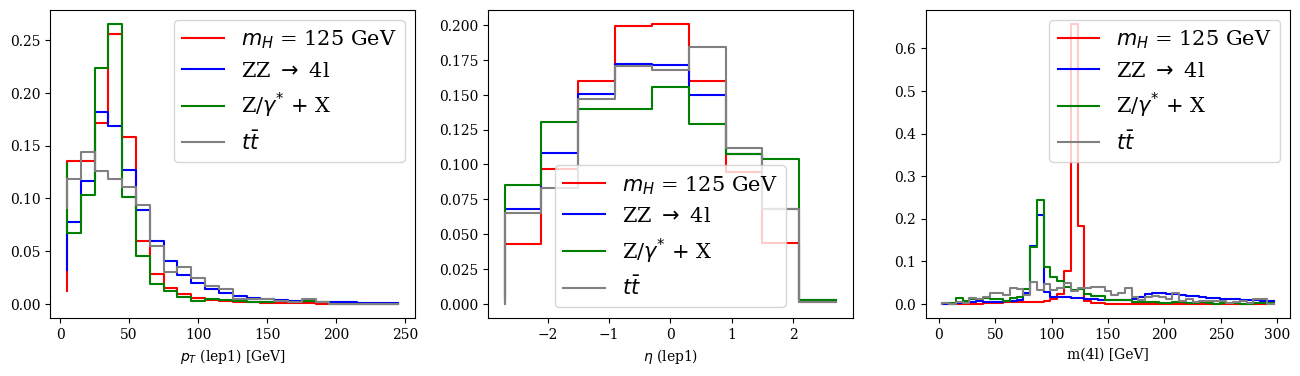

In [52]:
pt1 = [mc_sig['pt1'], mc_bkg_zz['pt1'], mc_bkg_dy['pt1'], mc_bkg_tt['pt1']]
eta1 = [mc_sig['eta1'], mc_bkg_zz['eta1'], mc_bkg_dy['eta1'], mc_bkg_tt['eta1']]
m4l = [mc_sig['m4l'], mc_bkg_zz['m4l'], mc_bkg_dy['m4l'], mc_bkg_tt['m4l']]

plt.figure(figsize = (16,4))
plt.subplot(1, 3, 1)
plotShape(pt1, r"$p_T$ (lep1) [GeV]", 0, 250, 25)
plt.subplot(1, 3, 2)
plotShape(eta1, r"$\eta$ (lep1)",-3, 3, 10)
plt.subplot(1, 3, 3)
plotShape(m4l, "m(4l) [GeV]", 0, 300, 50)

#YOUR CODE HERE: plot more distributions!

Before starting our analysis, let's try to plot the four-lepton invariant mass including data and the proper MC normalisation factors


In [53]:
#@title Defining plotM4l: it plots the 4l invariant mass for MC (signal and backgrounds) and data. MC are properly scaled to match data.
#We will do this plot many times, better to write a function that returns our plot :)

def plotM4l(mc_all, data, rmin, rmax, nbins):
  #create MC histogram (with weights!)
  hist_mc = []
  for mc in mc_all:
    hist, bins = np.histogram(mc['m4l'], bins = nbins, range = (rmin,rmax), weights = mc['scale'])
    hist_mc.append(hist)
  hist_mc.reverse()

  #create data histogram
  hist_data, bins = np.histogram(data['m4l'], bins = nbins, range = (rmin,rmax))

  #plot it!
  plt.style.use('mystyle.mplstyle')
  plt.figure(figsize = (8,6))

  binwidth = bins[1] - bins[0]
  bincenter = 0.5 * (bins[:-1] + bins[1:])

  ## MC
  for i,hmc in enumerate(hist_mc):
    if i == 0:
        stack = plt.bar(bincenter, hmc, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
                 alpha = 0.5)
        bot = hmc
    else:
        stack = plt.bar(bincenter, hmc, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
                 bottom = bot, alpha = 0.5)
        bot = bot + hmc

  ## Measured data
  xerrs = [binwidth*0.5 for i in range(0, nbins)]
  yerrs = np.sqrt(hist_data)
  marker_data = plt.errorbar(bincenter, hist_data, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

  #some costetics
  plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 15, position=(0.64,0.95))
  plt.xlabel('$m_{4l}$ [GeV]',fontsize = 20, position=(0.92,0.1))
  plt.ylabel('Events / 3 GeV',fontsize = 20, position=(0.1,0.84))
  plt.xlim(rmin,rmax)
  plt.legend(fontsize = 20)

  plt.show()

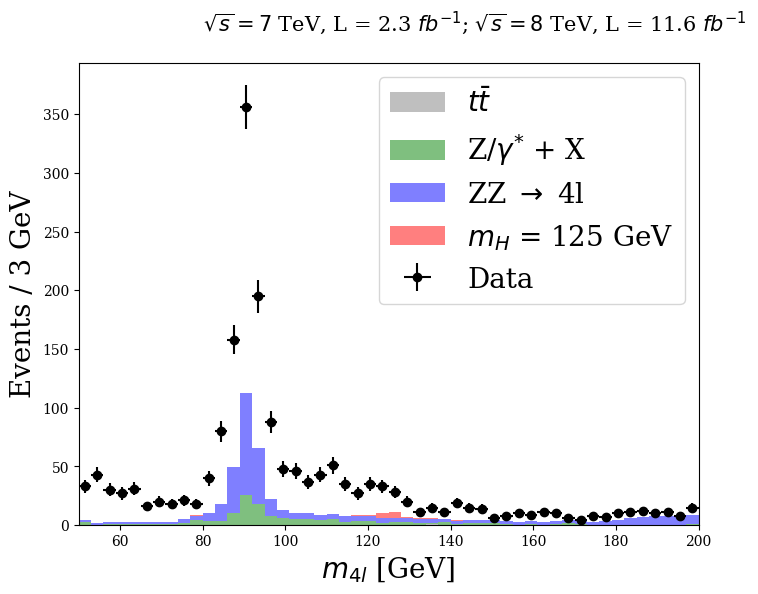

In [54]:
#plot the 4m invariant mass!
rmin = 50
rmax = 200
nbins = 50
plotM4l(mc_all, data, rmin, rmax, nbins)

You can already see the Z peak from the plot. While this is a direct plot from the pre-processed data, without any further selections, **you can hardly distinguish the Higgs peak from the backgrounds' statistical fluctuation**, nor make any quantitative measurements. And also you may notice that currently the MC doesn't agree with data in current plot. That is because the MC simulations are generated already in particular model (like ZZ to 4mu, 4e or 2mu2e), while the data is a broader collection. That's also why you need to apply selection, to clean up the unknown process bkgs, and reduce the known process bkgs (those with MC stacked here) with the help of the MC study demonstrated above.

# Data analysis: additional selections

The code below is a starting point of making selections.

There are four functions:<br>


1.  **Lepton_selection**:  
    Function to compute a selection on a single object (lepton).
    Currently as an example, I apply the pt cut on the objects: if it is a muon, require pt > 5GeV, while for electron it is 7 GeV, more to apply
2.  **add_lepton_selection**:
    For a given dataset, add a new column called "PassObj", it is a bool value to indicate this event passes the object selection or not. Only when all the 4 leptons pass the single object selection, we mark it as 1, otherwise it is 0. Iterate each event to assign its value of "PassObj"
3.  **event_selection**:
    Function to compute a selection on the entire event (i.e. all 4 leptons together). As an example, I simply applied `PID1+PID2+PID3+PID4 == 0` to make sure the charge and lepton flavor are conserved. More to add. Like, if it is 2e2mu, they automatically pair up; while if it is 4mu or 4e, there're 3 combinations, select based on charge conservation of Z->ll decay and the reconstructed mass to the ture Z boson mass.
4.  **add_event_selection**:
    same as function add_lepton_selection, add a new column "PassEvt" to indicate this event passes the event selection or not.

After that we apply both to data and all the mc, you can tell from the print out of data that there're two more column at the end of each event, named "PassObj" and "PassEvt".

Then we make the selection: require an event to pass both the object and event selection by <br>
`data = data.query('PassObj == 1 and PassEvt == 1')`

In [136]:
def lepton_selection(pid,pT,eta):  ## object selection for a single lepton (1,2,3,4)
    #YOUR CODE HERE: add a cut on the lepton pseudorapidity
    #if (np.abs(pid) == 13 and pT > 5.) or (np.abs(pid) == 11 and pT > 7.):
    if (np.abs(pid) == 13 and pT > 5. and np.abs(eta)<2.4) or (np.abs(pid) == 11 and pT > 7. and np.abs(eta)<2.5):
        return 1
    else:
        return 0

## Add a column to the dataset indicating whether this event passes the object selection,
## i.e. all four leptons fullfil the requirement

def add_lepton_selection(df):
    pass_obj = []
    for event in df.itertuples():   ## loop over each event(each row)
        lep1_sel = lepton_selection(event.PID1,event.pt1,event.eta1)
        lep2_sel = lepton_selection(event.PID2,event.pt2,event.eta2)
        lep3_sel = lepton_selection(event.PID3,event.pt3,event.eta3)
        lep4_sel = lepton_selection(event.PID4,event.pt4,event.eta4)
        decision = lep1_sel and lep2_sel and lep3_sel and lep4_sel
        pass_obj.append(decision)
    df['PassObj'] = pass_obj

# Let's take ideas from the paper

From Section 5.2 of the [paper](https://arxiv.org/pdf/1207.7235.pdf):

> *The event selection requires two pairs of same-flavour, oppositely charged leptons. The pair with invariant mass closest to the Z boson mass is required to have a mass in the range 40–120 GeV and the other pair is required to have a mass in the range 12–120 GeV.*



In [143]:
def ZZ_mass(m_z1,m_z2):
   #YOUR CODE HERE: write a function that returns 1 if the Z mass is within a given range.
   #please note that you have two Z candidates only one is on-shell!!
   deltam1 = np.abs(m_z1-mZ)
   deltam2 = np.abs(m_z2-mZ)
   if deltam1 < deltam2: #m_z1 is closest to Z nominal mass
     selection = m_z1>40 and m_z1<120 and m_z2>12 and m_z2<120
   else: #m_z2 is closest to Z nominal mass
     selection = m_z2>40 and m_z2<120 and m_z1>12 and m_z1<120
   return selection


def event_selection(evt):

    if(evt.PID1+evt.PID2+evt.PID3+evt.PID4 != 0):    ### charge conservation and lepton flavor conservation
        return 0

    #########################################
    ########## More Selections ##############
    #########################################

    # out of 4 leptons, three combinations can be made

    ##c1
    m_z_12=InvMass_2l(evt.E1,evt.px1,evt.py1,evt.pz1,evt.E2,evt.px2,evt.py2,evt.pz2)
    m_z_34=InvMass_2l(evt.E3,evt.px3,evt.py3,evt.pz3,evt.E4,evt.px4,evt.py4,evt.pz4)
    ##c2
    m_z_13=InvMass_2l(evt.E1,evt.px1,evt.py1,evt.pz1,evt.E3,evt.px3,evt.py3,evt.pz3)
    m_z_24=InvMass_2l(evt.E2,evt.px2,evt.py2,evt.pz2,evt.E4,evt.px4,evt.py4,evt.pz4)
    ##c3
    m_z_14=InvMass_2l(evt.E1,evt.px1,evt.py1,evt.pz1,evt.E4,evt.px4,evt.py4,evt.pz4)
    m_z_23=InvMass_2l(evt.E2,evt.px2,evt.py2,evt.pz2,evt.E3,evt.px3,evt.py3,evt.pz3)

    #  we apply the mass selection only looking at opposite-signed lepton pairs
    sel_c1 = (evt.PID1+evt.PID2 == 0) and ZZ_mass(m_z_12,m_z_34)
    sel_c2 = (evt.PID1+evt.PID3 == 0) and ZZ_mass(m_z_13,m_z_24)
    sel_c3 = (evt.PID1+evt.PID4 == 0) and ZZ_mass(m_z_14,m_z_23)

    return sel_c1 or sel_c2 or sel_c3
    #############################################################################

## Add a column to the dataset indicating whether this event passes the event selection
def add_event_selection(df):   ### Similar as the Function: add_lepton_selection shown above
    pass_evt = []
    for event in df.itertuples():
        pass_evt.append(event_selection(event))
    df['PassEvt'] = pass_evt

In [144]:
### Apply object selection and event selection to data and each MC process###

add_lepton_selection(data)
add_event_selection(data)
print(data)
data_sel = data.query('PassObj == 1 and PassEvt == 1')

mc_all_sel = []
for i,mc in enumerate(mc_all):
  add_lepton_selection(mc)
  add_event_selection(mc)
  mc_sel = mc.query('PassObj == 1 and PassEvt == 1')
  mc_all_sel.append(mc_sel)

<ipython-input-44-df5425860914>:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))


         Run      Event  PID1  Q1         E1       px1       py1         pz1  \
0     160957  474149791   -13   1   20.13980  -7.61603  11.54710   14.637600   
1     160957  475508059    13  -1    7.74065  -4.99690  -5.90112   -0.338132   
2     160998  143208778    13  -1   21.25180  -3.74665  -6.08794   20.013200   
3     161016   88729201    13  -1    8.23905  -4.98656   3.22091   -5.712330   
4     161103   72943593   -13   1   38.21730  -8.29373   7.24964   36.595200   
...      ...        ...   ...  ..        ...       ...       ...         ...   
2719  203002  630169854    13  -1  161.05200 -29.15820  52.86600 -149.307000   
2720  203002  714998441   -13   1   76.87830   9.13736  34.28980   68.198000   
2721  203002  768688424   -13   1   37.45650 -34.65030 -11.53190    8.327820   
2722  203002   78542112   -13   1   18.71270  -1.20070   4.50190   18.123000   
2723  203002  891197461   -13   1   14.95760   4.06168  -2.07323  -14.245100   

          eta1      phi1  ...      eta4

<ipython-input-44-df5425860914>:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
<ipython-input-44-df5425860914>:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
<ipython-input-44-df5425860914>:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))


Now, when you are satisfied with your selections, let's take a look at the data and make the invariant mass plot!

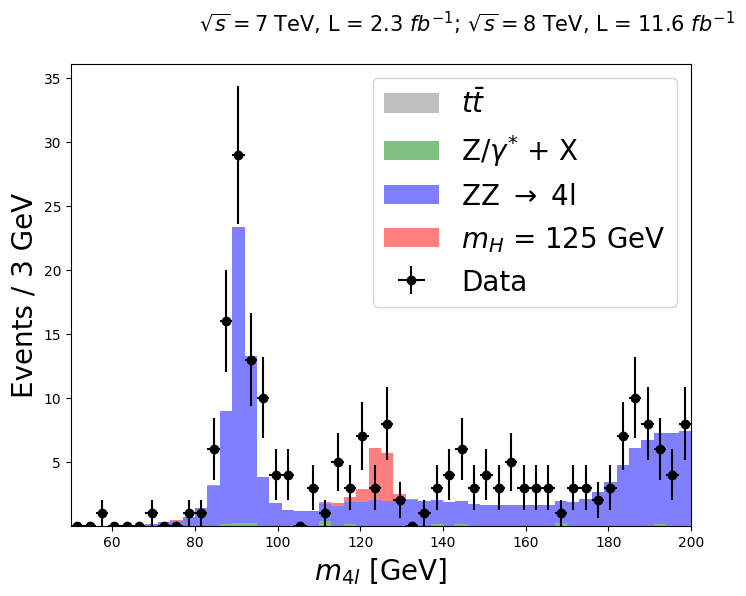

In [145]:
rmin = 50
rmax = 200
nbins = 50
plotM4l(mc_all_sel, data_sel, rmin, rmax, nbins)

If your selections are reasonable, after applying those selections on both data and MC, **you should see that in your plot, data agrees with MC predictions at a certain level, and also see the Higgs peak**.

**Question**: compare the stack of the backgrounds MC with your data, how large is your excess around 125GeV? Make use of the MC to quantify your observation.

To access the statistical significance of your observation, we can start from the p-value. The primary role of the p-value is to quantify the probability
that the background-only model gives a statistical fluctuation as big as the one seen or bigger.

Assuming the entries of each bin to be a Poisson random variable, if we observe let's say 23 entries over an expected background of 8, the p-value of the *null* (background-only) hypothesis is:
$P(n\ge 23; b = 8, s = 0) = 0.00001$

Another simple metrics we can report is the signal significance, in its simplest version expressed as:
# $\frac{s}{\sqrt{s+b}}$

where s and b are the observed signal and the expected background yields under the mass peak around 125 GeV.



---
WELL DONE!

Here is some **extra** material for your analysis: what if we use Machine Learning for enhancing the significance of the Higgs mass peak?

We will use a simple neural network (NN) with one hidden layer:

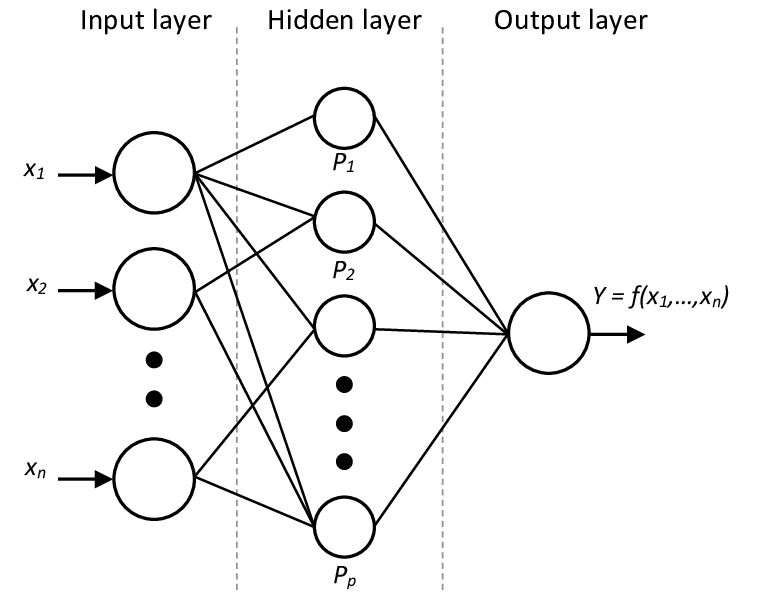


In [100]:
# Features we think can help distinguishing between signal and backgrounds
vars_training = ['PID1', 'Q1', 'E1', 'px1', 'py1', 'pz1', 'eta1', 'phi1',
                 'PID2', 'Q2', 'E2', 'px2', 'py2', 'pz2', 'eta2', 'phi2',
                 'PID3', 'Q3', 'E3', 'px3', 'py3', 'pz3', 'eta3', 'phi3',
                 'PID4', 'Q4', 'E4', 'px4', 'py4', 'pz4', 'eta4', 'phi4']
NVARS = len(vars_training)

#Features we will need
vars_spectator = ['scale']

In [131]:
# baseline keras model
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam
from keras.layers import Input, Activation, Dense, Dropout

In [102]:
# Select the NN input variables. Using just lepton and and jets 4-mom ( low level veriables) !
input  = Input(shape=(NVARS,), name = 'input')
hidden = Dense(NVARS , name = 'hidden', kernel_initializer='normal', activation='relu')(input)
hidden = Dropout(rate=0.5)(hidden)
output  = Dense(1      , name = 'output', kernel_initializer='normal', activation='sigmoid')(hidden)

# create the model
model = Model(inputs=input, outputs=output)
# Define the optimizer ( minimization algorithm )
optim = SGD(lr=0.01,decay=1e-6)
#optim = Adam()
# compile the model
model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

We assign a label:
*   1 for our $H\rightarrow ZZ*\rightarrow 4\ell$
*   0 for all background processes

to be used by the neural network.

During training, the **NN will try to predict this label** and the *true* value will be used to evaluate how far the prediction is from reality ("accuracy").
The **distance between true and predicted labels is minimised** during the training. After reaching the minimum, the parameters of the NN are set and the NN can be used to make predictions on unseen events: **data!**



In [103]:
# add label for classification task
mc_sig['Y'] = np.ones(len(mc_sig))
mc_bkg_zz['Y'] = np.zeros(len(mc_bkg_zz))
mc_bkg_dy['Y'] = np.zeros(len(mc_bkg_dy))
mc_bkg_tt['Y'] = np.zeros(len(mc_bkg_tt))

In [104]:
#combine for training
train_all = pd.concat([mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt])
#take only columns used in training
train_all = train_all[vars_training+['Y']]
dataset = train_all.values
NDIM = len(train_all)
X = dataset[:,0:NVARS]
Y = dataset[:,NVARS]

from sklearn.model_selection import train_test_split
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

In [107]:
# Number of training epochs
nepochs=50
# Batch size
batch=500
# Train classifier
history = model.fit(X_train_val[:,0:NVARS],
                    Y_train_val,
                    epochs=nepochs,
                    batch_size=batch,
                    verbose=1, # switch to 1 for more verbosity
                    validation_split=0.3)

Epoch 1/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9093 - loss: 0.2680 - val_accuracy: 0.9090 - val_loss: 0.2512
Epoch 2/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9082 - loss: 0.2679 - val_accuracy: 0.9090 - val_loss: 0.2482
Epoch 3/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9084 - loss: 0.2663 - val_accuracy: 0.9090 - val_loss: 0.2468
Epoch 4/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9083 - loss: 0.2661 - val_accuracy: 0.9090 - val_loss: 0.2446
Epoch 5/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9091 - loss: 0.2629 - val_accuracy: 0.9090 - val_loss: 0.2418
Epoch 6/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9089 - loss: 0.2608 - val_accuracy: 0.9090 - val_loss: 0.2382
Epoch 7/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9077 - loss: 0.2625 - val_accuracy: 0.9090 - val_loss: 0.2373
Epoch 8/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9081 - loss: 0.2583 -

6376/6376 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


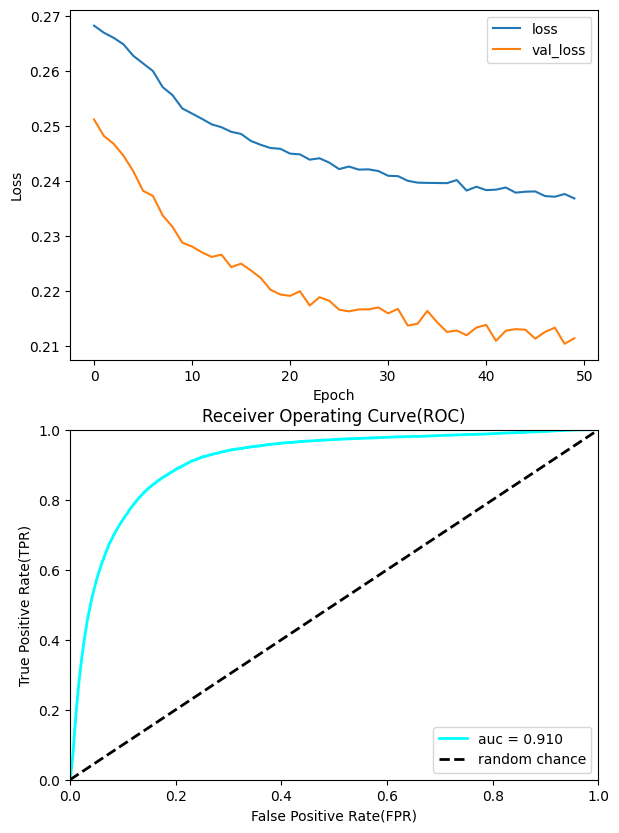

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
plt.figure(figsize=(15,10))

# plot loss vs epoch
ax = plt.subplot(2, 2, 1)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Plot ROC
Y_predict = model.predict(X_test[:,0:NVARS])
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('False Positive Rate(FPR)')
ax.set_ylabel('True Positive Rate(TPR)')
ax.set_title('Receiver Operating Curve(ROC)')
ax.legend(loc="lower right")
plt.show()

In [109]:
#associate NN and add column to dataframe
def add_NN_score(df, vars, model):
  dataset = df[vars].values
  score = model.predict(dataset)
  df["score"] = score

In [110]:
#associate NN prediction to each MC sample
for mc in mc_all:
  add_NN_score(mc, vars_training, model)

2900/2900 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
28931/28931 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [111]:
#associate NN prediction to data
add_NN_score(data, vars_training, model)

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


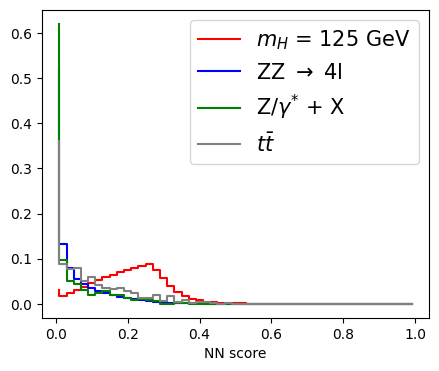

In [112]:
NNscore = [mc_sig['score'], mc_bkg_zz['score'], mc_bkg_dy['score'], mc_bkg_tt['score']]
plt.figure(figsize = (5,4))
plotShape(NNscore, r"NN score", 0, 1, 50)

In [150]:
#let's set a cut, for example at 0.2

cut = 0.15
#data
data_sel_NN = data[data['score']>cut]

#MC
mc_all_sel_NN = []
for mc in mc_all:
  mc_sel_NN = mc[mc['score']>cut]
  mc_all_sel_NN.append(mc_sel_NN)

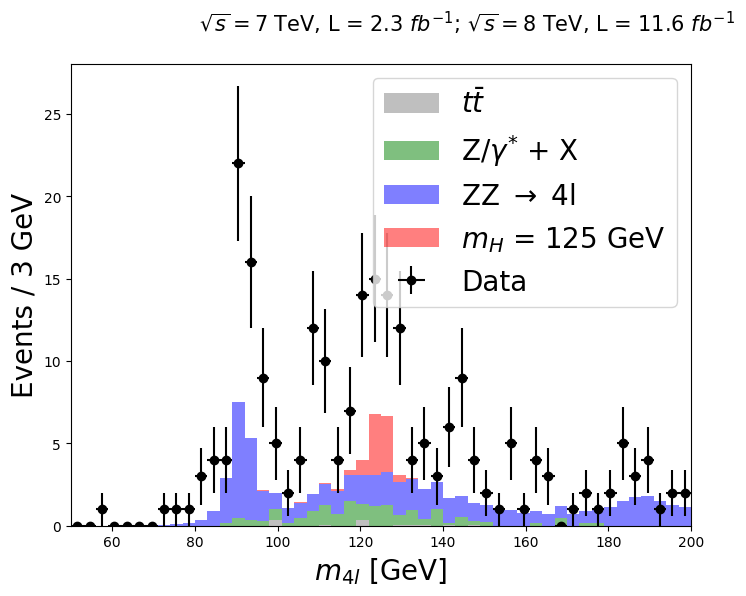

In [151]:
rmin = 50
rmax = 200
nbins = 50
plotM4l(mc_all_sel_NN, data_sel_NN, rmin, rmax, nbins)

61
18.584032433751332


<ipython-input-152-3aae070a528f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc['scale']=mc['scale']*SF


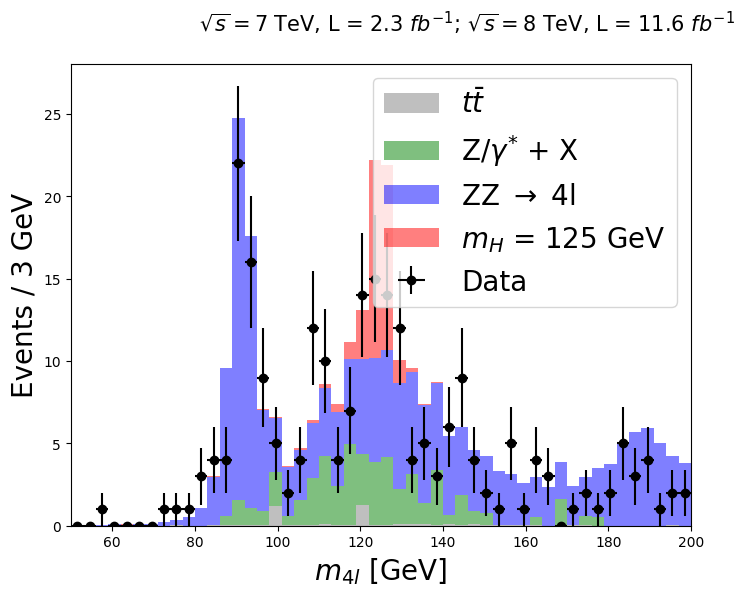

In [152]:
#MC are scaled off, we would need a more refined analysis to access how the NN cuts acts on data and MC and why efficiency is different
#Trick: scale MC based on the Z peak

data_sel_NN['m4l']

data_entries = len(data_sel_NN[(data_sel_NN['m4l']>80) & (data_sel_NN['m4l']<100)])
ZZ_entries = mc_all_sel_NN[1][(mc_all_sel_NN[1]['m4l']>80) & (mc_all_sel_NN[1]['m4l']<100)]['scale'].sum()

print(data_entries)
print(ZZ_entries)

#compute scale factor
SF = data_entries/ZZ_entries

#multiply the normalisation factor for all MC and re-plot
for mc in mc_all_sel_NN:
  mc['scale']=mc['scale']*SF

plotM4l(mc_all_sel_NN, data_sel_NN, rmin, rmax, nbins)